In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keug\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\keug\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [6]:
print(df_train.info())
print(df_train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17307 entries, 0 to 17306
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   essay_id   17307 non-null  object
 1   full_text  17307 non-null  object
 2   score      17307 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 405.8+ KB
None
  essay_id                                          full_text  score
0  000d118  Many people have car where they live. The thin...      3
1  000fe60  I am a scientist at NASA that is discussing th...      3
2  001ab80  People always wish they had the same technolog...      4
3  001bdc0  We all heard about Venus, the planet without a...      4
4  002ba53  Dear, State Senator\n\nThis is a letter to arg...      3


In [7]:
df_train.describe()

,score
count,17307.000000
mean,2.948402
std,1.044899
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,6.000000


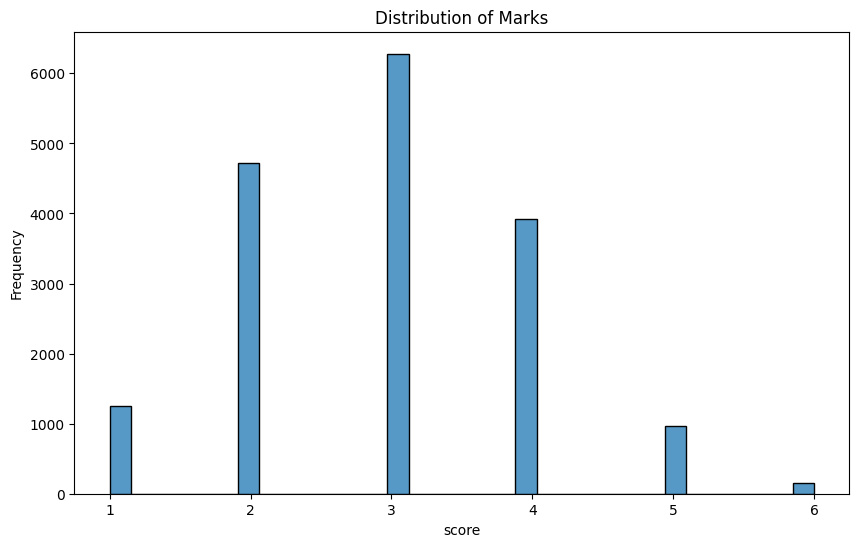

In [21]:
# Distribution of marks

plt.figure(figsize=(10, 6))
sns.histplot(df_train['score'], kde=False)
plt.title('Distribution of Marks')
plt.xlabel('score')
plt.ylabel('Frequency')
plt.show()

In [16]:
df_train['essay_length'] = df_train['full_text'].apply(lambda x: len(x.split()))
df_train['essay_length']

0        498
1        332
2        550
3        451
4        373
        ... 
17302    157
17303    579
17304    215
17305    231
17306    155
Name: essay_length, Length: 17307, dtype: int64

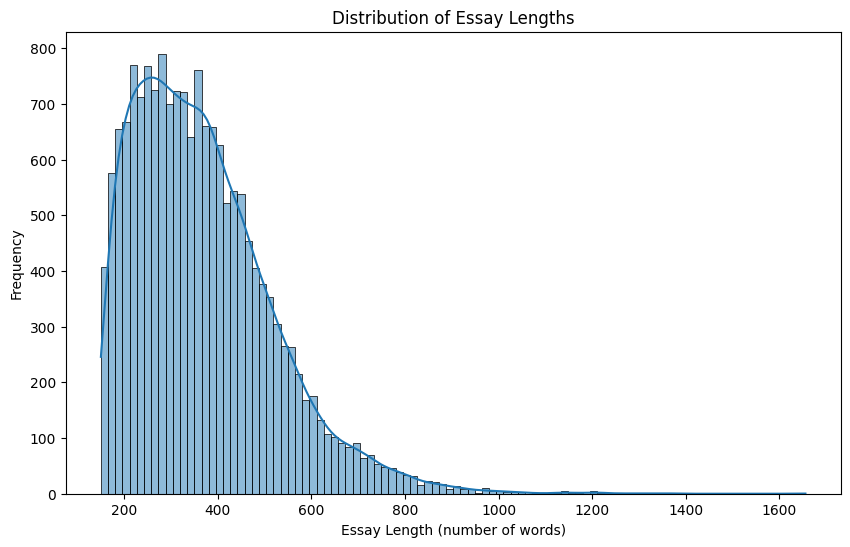

In [17]:
# Distribution of Essay Lengths
plt.figure(figsize=(10, 6))
sns.histplot(df_train['essay_length'], kde=True)
plt.title('Distribution of Essay Lengths')
plt.xlabel('Essay Length (number of words)')
plt.ylabel('Frequency')
plt.show()

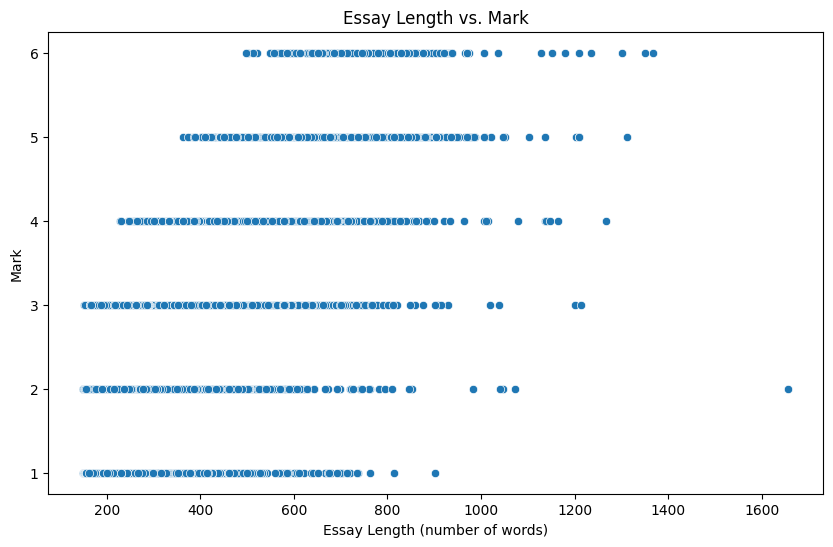

In [20]:
# Correlation Analysis between text length and marks
plt.figure(figsize=(10, 6))
sns.scatterplot(x='essay_length', y='score', data=df_train)
plt.title('Essay Length vs. Mark')
plt.xlabel('Essay Length (number of words)')
plt.ylabel('Mark')
plt.show()

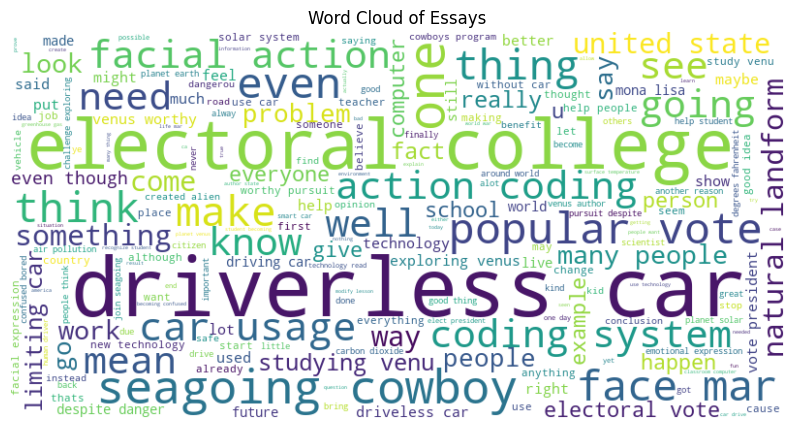

In [27]:
# Word Cloud
stop_words = set(stopwords.words('english'))

def preprocess(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

all_words = ' '.join(df_train['full_text'].apply(preprocess))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Essays')
plt.show()

In [29]:
# Plot correlation between marks and word frequencies

# Preprocess the text
def preprocess(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in ENGLISH_STOP_WORDS]
    return words

df_train['processed_essay'] = df_train['full_text'].apply(preprocess)

In [32]:
# Count word frequencies

all_words = [word for essay in df_train['processed_essay'] for word in essay]
word_counts = Counter(all_words)
most_common_words = [word for word, count in word_counts.most_common(20)]

In [33]:
# Calculate frequency of the most common words in each essay
for word in most_common_words:
    df_train[f'freq_{word}'] = df_train['processed_essay'].apply(lambda x: x.count(word))

In [40]:
# Calculate correlations with marks

correlations = {}
for word in most_common_words:
    correlations[word] = df_train['score'].corr(df_train[f'freq_{word}'])

In [43]:
# Convert the correlation dictionary to a DataFrame for easy plotting

corr_df = pd.DataFrame(list(correlations.items()), columns=['Word', 'Correlation']).sort_values(by='Correlation', ascending=False)
print(corr_df)

          Word  Correlation
0         cars     0.249948
13      states     0.238217
2          car     0.218122
11  technology     0.207729
17         way     0.202422
6   driverless     0.193114
16        make     0.185963
1       people     0.181981
19        time     0.164327
5         just     0.146082
10        help     0.132770
15     college     0.112534
8    electoral     0.105084
14        vote     0.103503
7         face     0.063021
4         like     0.062200
18       earth     0.049121
3        venus     0.044364
12      planet     0.022428
9        think    -0.017846
